In [1]:

%matplotlib inline

from modsim import *

In [2]:
"""m = UNITS.meter
s = UNITS.second
radian = UNITS.radian"""

'm = UNITS.meter\ns = UNITS.second\nradian = UNITS.radian'

In [3]:
condition = Condition(r_mars = 3389000, r_satellite = 13634000, mass_mars = 6.417 * 10 **26,
                   angular_velocity_mars = 7.09 * 10 **-5, G = 6.672 * 10 **-11)

In [4]:
def make_system_mars(condition):
    unpack(condition)
    
    init = State(theta_mars = 0)
    
    ts = linspace(0, 88666.64, 200)
    
    system=System(init=init, angular_velocity_mars=angular_velocity_mars, r_mars=r_mars, r_satellite=r_satellite, ts=ts)
    
    return system

In [5]:
def slope_function_mars(state, t, system):
    
    theta_mars=state
    
    unpack(system)
    
    return angular_velocity_mars

(-5500000, 5500000)

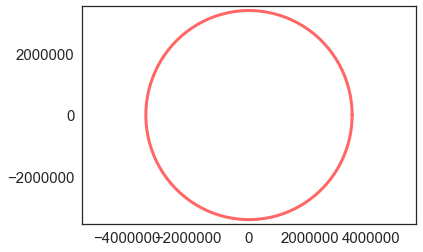

In [6]:
system=make_system_mars(condition)
run_odeint(system, slope_function_mars)
for theta in system.results.theta_mars:
    plot(np.cos(theta)*system.r_mars, np.sin(theta)*system.r_mars, 'r')
xlim([-5500000,5500000])
#plot(system.results.theta_mars)
##decorate(xlabel='Time (seconds)', 
         ##ylabel='Angle (radians)')

In [7]:
def make_system_satellite(condition):
    unpack(condition)
    angular_velocity_satellite = 1/r_satellite * sqrt(G * mass_mars / r_satellite)
    init = State(theta_satellite = 0 )
    ts = linspace(0, 88666.64, 1500)
    system=System(init=init, angular_velocity_satellite=angular_velocity_satellite, r_satellite=r_satellite, ts=ts)
    return system

In [8]:
def slope_function_satellite(state, t, system):
    theta_satellite=state
    unpack(system)
    return angular_velocity_satellite

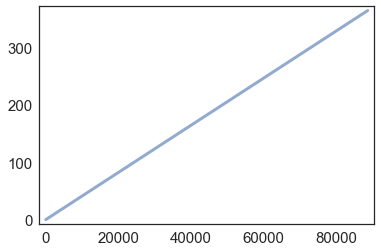

In [9]:
system=make_system_satellite(condition)
run_odeint(system, slope_function_satellite)
plot(system.results.theta_satellite)
##decorate(xlabel='Time (seconds)', 
         ##ylabel='Angle (radians)')

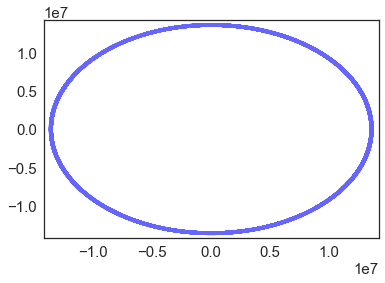

In [11]:
system=make_system_satellite(condition)
run_odeint(system, slope_function_satellite)
for theta in system.results.theta_satellite:
    plot(np.cos(theta)*system.r_satellite, np.sin(theta)*system.r_satellite, 'b')
#plot(system.results.theta_mars)
##decorate(xlabel='Time (seconds)', 
         ##ylabel='Angle (radians)')